In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import plotly.graph_objs as go
import plotly.express as px
from keras.layers import Input, Dense, Activation, LeakyReLU
from keras import models
from keras.optimizers import RMSprop, Adam

%matplotlib inline
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data = pd.read_csv('../input/coronavirus-tunisia/Coronavirus_Tunisia_updated.csv')
data = data.fillna(0)
data4 = pd.DataFrame()
l=[]
more_90 = data[data["age"]>90.0]["age"].count()
b_81_90 = data[(81<=data["age"]) & (data["age"]<=90.0)]["age"].count()
b_71_80 = data[(71<=data["age"]) & (data["age"]<=80.0)]["age"].count()
b_61_70 = data[(61<=data["age"]) & (data["age"]<=70.0)]["age"].count()
b_51_60 = data[(51<=data["age"]) & (data["age"]<=60.0)]["age"].count()
b_41_50 = data[(41<=data["age"]) & (data["age"]<=50.0)]["age"].count()
b_31_40 = data[(31<=data["age"]) & (data["age"]<=40.0)]["age"].count()
b_21_30 = data[(21<=data["age"]) & (data["age"]<=30.0)]["age"].count()
b_11_20 = data[(11<=data["age"]) & (data["age"]<=20.0)]["age"].count()
b_1_10 = data[(0.1<=data["age"]) & (data["age"]<=10.0)]["age"].count()
l = [ ]
l2 = []

l = [b_1_10, b_11_20, b_21_30, b_31_40, b_41_50, b_51_60, b_61_70, b_71_80, b_81_90, more_90]
l2=["1-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", ">90"]

data4['Number of cases'] = l
data4['Age'] = l2

fig = px.bar(data4, x="Age", y="Number of cases", color='Number of cases', orientation='v', height=600,
             title='Confirmed cases in Tunisia: Breakdown by age', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [3]:
data = pd.read_csv('../input/coronavirus-tunisia/Coronavirus_Tunisia_updated.csv')
data = data.fillna('Unavailable')

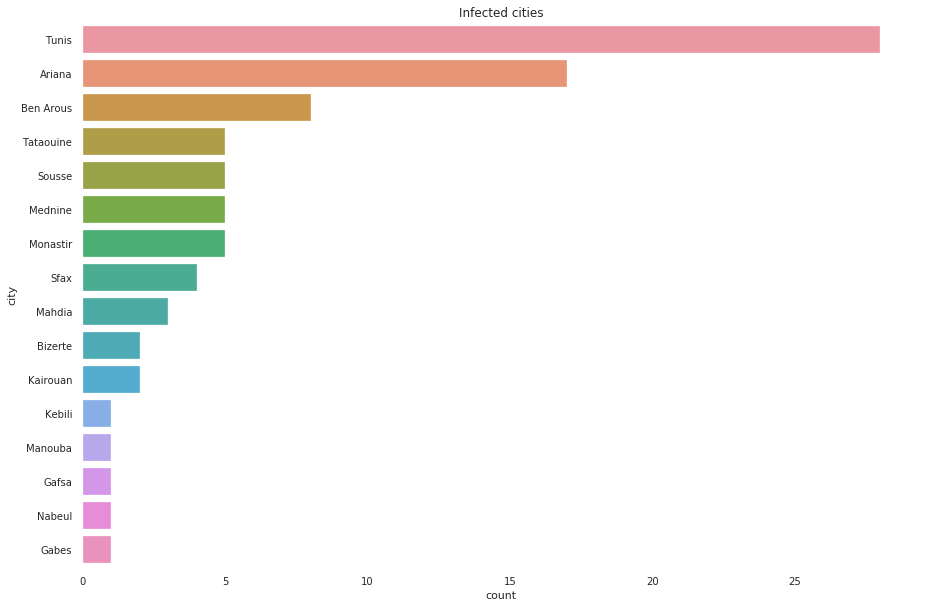

In [4]:
plt.figure(figsize=(15,10))
plt.title('Infected cities')
sns.countplot(y='city', data=data, order=data.city.value_counts().index)

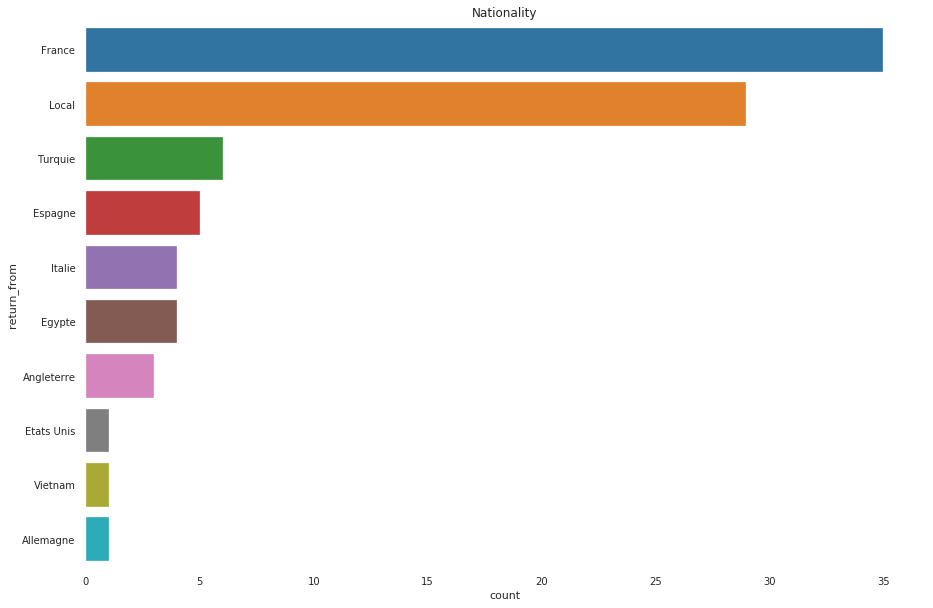

In [5]:
plt.figure(figsize=(15,10))
plt.title('Nationality')
sns.countplot(y='return_from', data=data, order=data.return_from.value_counts().index)

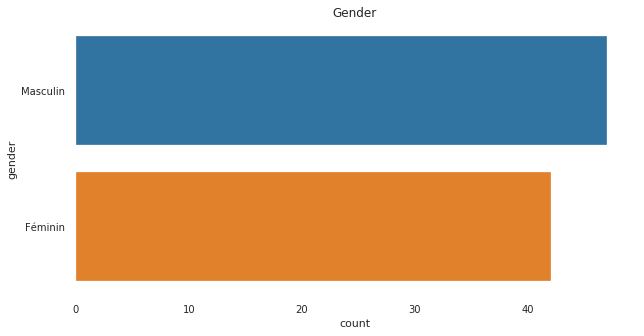

In [6]:
plt.figure(figsize=(10,5))
plt.title('Gender')
sns.countplot(y='gender', data=data, order=data.gender.value_counts().index)

In [7]:
count=[0]
confirmation_date=['2020-03-01']
count.extend(list(data.groupby(['confirmation_date'])['age'].count()))
confirmation_date.extend(sorted(list(set(data['confirmation_date']))))
l=['2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07']
l2=[0,0,0,0,0]
confirmation_date.insert(2, '2020-03-03')
confirmation_date.insert(3, '2020-03-04')
confirmation_date.insert(4, '2020-03-05')
confirmation_date.insert(5, '2020-03-06')
confirmation_date.insert(6, '2020-03-07')
confirmation_date.append('2020-03-23')
confirmation_date.append('2020-03-24')
confirmation_date.append('2020-03-25')
count.insert(2, 0)
count.insert(3, 0)
count.insert(4, 0)
count.insert(5, 0)
count.insert(6, 0)
count.append(25)
count.append(59)
count.append(24)
data_count=pd.DataFrame(count, confirmation_date, columns=["Number of cases"])
data_count.style.background_gradient(cmap='Reds')

,Number of cases
2020-03-01,0
2020-03-02,1
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,0
2020-03-07,0
2020-03-08,1
2020-03-09,3
2020-03-10,1


In [8]:
data_count['confirmation_date'] = list(data_count.index)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['confirmation_date'], y=data_count['Number of cases'],
                    mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Confirmed cases in Tunisia each day',plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [9]:
fig = px.bar(data_count, x="confirmation_date", y="Number of cases", color='Number of cases', orientation='v', height=600,
             title='Confirmed cases in Tunisia each day', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [10]:
beds = pd.read_csv('../input/coronavirus-tunisia/Hospital_beds.csv')
s=0
for i in range (data_count.shape[0]):
    s = s+data_count['Number of cases'].iloc[i]
    data_count.loc[confirmation_date[i],'Number of cases'] = s


In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['confirmation_date'], y=data_count['Number of cases'],
                    mode='lines+markers',name='Total Cases'))

fig.update_layout(title_text='Total Confirmed cases in Tunisia',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [12]:
fig = px.bar(data_count, x="confirmation_date", y="Number of cases", color='Number of cases', orientation='v', height=600,
             title='Total Confirmed cases in Tunisia', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['confirmation_date'], y=data_count['Number of cases'],
                         mode='lines+markers',name='Total Cases'))

beds2=pd.DataFrame(beds['beds'].sum(), confirmation_date, columns=["beds"])
beds2['confirmation_date']=confirmation_date
fig.add_trace(go.Scatter(x=beds2['confirmation_date'], y=beds2['beds'],
                         mode='lines',name="Total hospital's capacity",
                         line=dict(color='rgb(220,21,22)',width=2)))

fig.update_layout(title_text="Total Confirmed cases in Tunisia with the total hospital's capacity",plot_bgcolor='rgb(250, 242, 242)')



In [14]:
france = pd.read_csv("/kaggle/input/coronavirus-france-dataset/patient.csv")

In [15]:
france.dropna(subset=['confirmed_date'], inplace=True)
count2=[0]
confirmation_date2=['2020-01-26']
count2.extend(list(france.groupby(['confirmed_date'])['country'].count()))
confirmation_date2.extend(sorted(list(set(france['confirmed_date']))))
l=['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07']
confirmation_date2.insert(2, l[0])
confirmation_date2.insert(3, l[1])
confirmation_date2.insert(4, l[2])
confirmation_date2.insert(5, l[3])
confirmation_date2.insert(6, l[4])
confirmation_date2.insert(7, l[5])
confirmation_date2.insert(8, l[6])
confirmation_date2.insert(9, l[7])
confirmation_date2.insert(10, l[8])
confirmation_date2.insert(11, l[9])
confirmation_date2.insert(12, l[10])
count2.insert(2, 0)
count2.insert(3, 0)
count2.insert(4, 0)
count2.insert(5, 0)
count2.insert(6, 0)
count2.insert(7, 0)
count2.insert(8, 0)
count2.insert(9, 0)
count2.insert(10, 0)
count2.insert(11, 0)
count2.insert(12, 0)
data_count2=pd.DataFrame(count2, confirmation_date2, columns=["Number of cases"])

s=0
for i in range (data_count2.shape[0]):
    s = s+data_count2['Number of cases'].iloc[i]
    data_count2.loc[confirmation_date2[i],'Number of cases'] = s

day_fr=[]
day_tn=[]
for i in range (data_count2.shape[0]):
    day_fr.append("Day "+str(i+1))

data_count2['day'] = day_fr

for i in range (data_count.shape[0]):
    day_tn.append("Day "+str(i+1))
    
data_count['day'] = day_tn

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['day'], y=data_count['Number of cases'],
                         mode='lines+markers',name='Total Cases in Tunisia'))

fig.add_trace(go.Scatter(x=data_count2['day'].iloc[:-5], y=data_count2['Number of cases'],
                         mode='lines+markers',name="Total Cases in France",
                         line=dict(color='rgb(220,21,22)',width=2)))

fig.update_layout(title_text="Comparison between confirmed cases in Tunisia and in France",plot_bgcolor='rgb(250, 242, 242)')

In [16]:
data2 = pd.DataFrame()
data2['city'] = data.city.unique()
data2 = data2.sort_values('city')
data2["lat"] = ""
data2["long"] = ""
for i in range(0, len(data2)):
    if(data2.iloc[i]["city"]=="Tunis"):
        data2["lat"].iloc[i] = 36.806112
        data2["long"].iloc[i] = 10.171078
        
    elif(data2.iloc[i]["city"]=="Ariana"):
        data2["lat"].iloc[i] = 36.860117
        data2["long"].iloc[i] = 10.193371
        
    elif(data2.iloc[i]["city"]=="Ben arous"):
        data2["lat"].iloc[i] = 36.753056
        data2["long"].iloc[i] = 10.218889
        
    elif(data2.iloc[i]["city"]=="La manouba"):
        data2["lat"].iloc[i] = 36.808029
        data2["long"].iloc[i] = 10.097205
        
    elif(data2.iloc[i]["city"]=="Nabeul"):
        data2["lat"].iloc[i] = 36.456058
        data2["long"].iloc[i] = 10.73763
    
    elif(data2.iloc[i]["city"]=="Zaghouan"):
        data2["lat"].iloc[i] = 36.402907
        data2["long"].iloc[i] = 10.142925
        
    elif(data2.iloc[i]["city"]=="Bizerte"):
        data2["lat"].iloc[i] = 37.274423
        data2["long"].iloc[i] = 9.87391
        
    elif(data2.iloc[i]["city"]=="Béja"):
        data2["lat"].iloc[i] = 36.725638
        data2["long"].iloc[i] = 9.181692
    
    elif(data2.iloc[i]["city"]=="Jendouba"):
        data2["lat"].iloc[i] = 36.501136
        data2["long"].iloc[i] = 8.780239
    
    elif(data2.iloc[i]["city"]=="Le kef"):
        data2["lat"].iloc[i] = 36.174239
        data2["long"].iloc[i] = 8.704863
    
    elif(data2.iloc[i]["city"]=="Siliana"):
        data2["lat"].iloc[i] = 36.084966
        data2["long"].iloc[i] = 9.370818
    
    elif(data2.iloc[i]["city"]=="Sousse"):
        data2["lat"].iloc[i] = 35.825388
        data2["long"].iloc[i] = 10.636991
    
    elif(data2.iloc[i]["city"]=="Monastir"):
        data2["lat"].iloc[i] = 35.783333
        data2["long"].iloc[i] = 10.833333
    
    elif(data2.iloc[i]["city"]=="Mahdia"):
        data2["lat"].iloc[i] = 35.504722
        data2["long"].iloc[i] = 11.062222
    
    elif(data2.iloc[i]["city"]=="Sfax"):
        data2["lat"].iloc[i] = 34.740556
        data2["long"].iloc[i] = 10.760278
    
    elif(data2.iloc[i]["city"]=="Kairouan"):
        data2["lat"].iloc[i] = 35.678102
        data2["long"].iloc[i] = 10.096333
    
    elif(data2.iloc[i]["city"]=="Kasserine"):
        data2["lat"].iloc[i] = 35.167578
        data2["long"].iloc[i] = 8.836506
    
    elif(data2.iloc[i]["city"]=="Sidi bouzid"):
        data2["lat"].iloc[i] = 35.038234
        data2["long"].iloc[i] = 9.484935
    
    elif(data2.iloc[i]["city"]=="Gabès"):
        data2["lat"].iloc[i] = 33.881457
        data2["long"].iloc[i] = 10.098196
    
    elif(data2.iloc[i]["city"]=="Médenine"):
        data2["lat"].iloc[i] = 33.354947
        data2["long"].iloc[i] = 10.505478
    
    elif(data2.iloc[i]["city"]=="Tataouine"):
        data2["lat"].iloc[i] = 32.929674
        data2["long"].iloc[i] = 10.451767
    
    elif(data2.iloc[i]["city"]=="Gafsa"):
        data2["lat"].iloc[i] = 34.425
        data2["long"].iloc[i] = 8.784167
    
    elif(data2.iloc[i]["city"]=="Tozeur"):
        data2["lat"].iloc[i] = 33.919683
        data2["long"].iloc[i] = 8.13352
    
    else:
        data2["lat"].iloc[i] = 33.704387
        data2["long"].iloc[i] = 8.969034
data2.reset_index(drop=True, inplace=True)

count2 = list(data.groupby(['city']).count()['confirmation_date'])
data2['count'] = count2

data3 = data.groupby('city').first()

first_date = list(data3.groupby('city').first()['confirmation_date'])
first_age = list(data3.groupby('city').first()['age'])
first_return_from = list(data3.groupby('city').first()['return_from'])
first_gender = list(data3.groupby('city').first()['gender'])

data2['Date_of_the_first_Coronavirus_case'] = first_date
data2['First_case_age'] = first_age
data2['Got_it_from'] = first_return_from
data2['First_case_gender'] = first_gender

In [17]:
m = folium.Map(location=[33.8869, 10], tiles='cartodbpositron', zoom_start=6)

for i in range(0, len(data2)):
    
    folium.Circle(
        location=[data2.iloc[i]['lat'], data2.iloc[i]['long']],
        color='crimson',
        tooltip =   '<li><bold>City : '+str(data2.iloc[i]['city'])+
                    '<li><bold>Number of cases : '+str(data2.iloc[i]['count'])+
                    '<li><bold>Date of the first Coronavirus case : '+str(data2.iloc[i]['Date_of_the_first_Coronavirus_case'])+
                    '<li><bold>First case age : '+str(data2.iloc[i]['First_case_age'])+
                    '<li><bold>First case gender : '+str(data2.iloc[i]['First_case_gender'])+
                    '<li><bold>Return from : '+str(data2.iloc[i]['Got_it_from']),
        
        radius=int(data2.iloc[i]['count']**3)**1).add_to(m)
    
m

In [18]:
l=(list(data_count.groupby('confirmation_date').sum()['Number of cases'].iloc[1:]))
l.append(197)
data_y = (np.asarray(l).astype("float32"))
data_x = np.arange(1,len(data_y)+1)

In [19]:
Visible = Input(shape=(1,))
Dense_l1 = Dense(150,name="Dense_l1")(Visible)
LRelu_l1 = LeakyReLU(name = "LRelu_l1")(Dense_l1)
Dense_l2 = Dense(150,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l2 = Dense(150,name = "Dense_l2")(LRelu_l1)
LRelu_l2 = LeakyReLU(name = "LRelu_l2")(Dense_l2)
Dense_l3 = Dense(1,name="Dense_l3")(LRelu_l2)
LRelu_l3 = LeakyReLU(name = "Output")(Dense_l3)
model = models.Model(inputs=Visible, outputs=LRelu_l3)
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
Dense_l1 (Dense)             (None, 150)               300       
_________________________________________________________________
LRelu_l1 (LeakyReLU)         (None, 150)               0         
_________________________________________________________________
Dense_l2 (Dense)             (None, 150)               22650     
_________________________________________________________________
LRelu_l2 (LeakyReLU)         (None, 150)               0         
_________________________________________________________________
Dense_l3 (Dense)             (None, 1)                 151       
_________________________________________________________________
Output (LeakyReLU)           (None, 1)                 0   

In [20]:
epochs = 6000
model.fit(data_x.reshape([len(data_x), 1]),data_y.reshape([len(data_x), 1]),epochs=epochs)

Epoch 1/6000
25/25 [==============================] - 0s 13ms/step - loss: 5741.1899 - accuracy: 0.0000e+00
Epoch 2/6000
25/25 [==============================] - 0s 101us/step - loss: 5537.0674 - accuracy: 0.1200
Epoch 3/6000
25/25 [==============================] - 0s 114us/step - loss: 5342.6431 - accuracy: 0.2400
Epoch 4/6000
25/25 [==============================] - 0s 96us/step - loss: 5151.1152 - accuracy: 0.1600
Epoch 5/6000
25/25 [==============================] - 0s 81us/step - loss: 4964.2695 - accuracy: 0.1200
Epoch 6/6000
25/25 [==============================] - 0s 82us/step - loss: 4778.6128 - accuracy: 0.1200
Epoch 7/6000
25/25 [==============================] - 0s 93us/step - loss: 4596.7402 - accuracy: 0.2000
Epoch 8/6000
25/25 [==============================] - 0s 97us/step - loss: 4417.7168 - accuracy: 0.0400
Epoch 9/6000
25/25 [==============================] - 0s 88us/step - loss: 4239.0605 - accuracy: 0.0400
Epoch 10/6000
25/25 [==============================] - 0s 

In [21]:
model.save('model.h5')

In [22]:
model = models.load_model("model.h5")

In [23]:
case_nums_country = pd.DataFrame()
case_nums_country = data_count['Number of cases']
d = list(data_count['day'].iloc[1:])
temp_data = data_count.groupby('confirmation_date').sum()['Number of cases'].iloc[1:]

In [24]:
prediction_days = 4
data = (model.predict(np.arange(1,len(data_y)+prediction_days+1))).tolist()
data2=pd.DataFrame()
l=[]
for i in range (len(data)):
    l.append(int(data[i][0]))
l=[0]+l
data2['case']=l
data2['day']= list(data_count['day']) + ['Day 26', 'Day 27', 'Day 28', 'Day 29', 'Day 30']
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_count['day'], y=data_count['Number of cases'],
                         mode='lines+markers',name='Total Cases in Tunisia'))

fig.add_trace(go.Scatter(x=data2['day'], y=data2['case'],
                         name="Prediction",
                         line=dict(color='rgb(220,21,22)',width=2, dash='dot')))

fig.update_layout(title_text="Confirmed cases prediction for the next 5 days",plot_bgcolor='rgb(250, 242, 242)')